In [2]:
# imports
# Initial imports
import os
import requests
import json
import numpy as np
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import datetime as dt
from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_datareader import data,wb
import yfinance as yf
import FundamentalAnalysis as fa
import yahoo_fin.stock_info as si
dow_list = si.tickers_dow()
import yaml

In [3]:
# Load .env enviroment variables
load_dotenv()

True

In [4]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
fa_key = os.getenv("FA_API")

# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")
print(f"FA Key type: {type(fa_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>
FA Key type: <class 'str'>


In [5]:
today = pd.Timestamp("2021-03-17", tz="America/New_York").isoformat()

In [6]:
timeframe = "1D"

In [7]:
start_date = pd.to_datetime('2001-01-01')
end_date = pd.to_datetime('2021-01-01')

In [8]:
#SPY_20year = data.DataReader("SPY", 'yahoo', start_date, end_date)
#SPY_20year
#mdy_20year = data.DataReader("MDY", 'yahoo', start_date, end_date)
#mdy_20year
#apple_20year = data.DataReader("AAPL", 'yahoo', start_date, end_date)
#apple_20year
#monster_20year = data.DataReader("MNST", 'yahoo', start_date, end_date)
#monster_20year
#morgan_20year = data.DataReader("CPOAX", 'yahoo', start_date, end_date)
#morgan_20year
#companies = fa.available_companies(fa_key)
#companies
#profile_com = fa.profile("CMCSA", fa_key)
#profile_com

In [15]:
#import requests

#url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/auto-complete"

#querystring = {"q":"tesla","region":"US"}

#headers = {
    #'x-rapidapi-key': "a413148f15mshdd76b88ba530d6fp161541jsn5fb2c27eba06",
    #'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com"
    #}

#response = requests.request("GET", url, headers=headers, params=querystring)

#print(response.text)

In [16]:
#quote_table = si.get_quote_table("aapl", dict_result=False)
#quote_table

In [8]:
stocks =["SPY", "AAPL", "MMM", "JPM", "DIS", "XOM", "UNH", "QCOM", "AMZ", "GE", "PYPL", "WFC", "JNJ", "BP", "UPS", "SHOP", "DAL", "COF", "CTSH"]
stock_list = []
for stock in stocks:
    returns = yf.Ticker(stock)
    returns = returns.history(period="20y")                   #20yrs live data
    returns["returns"] =  returns["Close"].pct_change()
    returns.rename(columns={"returns": stock}, inplace=True)
    returns = returns[stock]
    stock_list.append(returns)
all_stock_returns =pd.DataFrame(stock_list).T
all_stock_returns.head()

,SPY,AAPL,MMM,JPM,DIS,XOM,UNH,QCOM,AMZ,GE,PYPL,WFC,JNJ,BP,UPS,SHOP,DAL,COF,CTSH
Date,,,,,,,,,,,,,,,,,,,
2001-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-04-09,0.011120,-0.002429,0.025294,0.000742,0.003861,0.004994,0.014252,0.013782,NaN,0.020160,NaN,-0.006270,0.009404,0.034414,-0.009783,NaN,NaN,0.022685,-0.053913
2001-04-10,0.018244,0.073027,0.038153,0.071252,0.022727,0.018058,-0.010539,0.078691,NaN,0.043571,NaN,0.027850,0.008658,0.017602,0.017894,NaN,NaN,0.058182,0.088235
2001-04-11,0.000686,-0.010888,-0.016211,0.033256,-0.021196,-0.024524,-0.022485,0.046926,NaN,-0.012777,NaN,-0.007197,-0.012931,-0.018248,-0.002747,NaN,NaN,0.033162,-0.090811
2001-04-12,0.018161,0.028439,0.008613,0.014081,0.016067,0.000732,0.010550,0.038168,NaN,0.033049,NaN,0.018550,0.001211,0.000774,-0.004591,NaN,NaN,-0.006319,-0.010702


In [9]:
# Count nulls
all_stock_returns.isnull().sum()

SPY        1
AAPL       1
MMM        1
JPM        1
DIS        1
XOM        1
UNH        1
QCOM       1
AMZ     2829
GE         1
PYPL    3582
WFC        1
JNJ        1
BP         1
UPS        1
SHOP    3551
DAL     1525
COF        1
CTSH       1
dtype: int64

In [10]:
all_stock_returns.dropna(inplace=True)
all_stock_returns.isnull().sum()

SPY     0
AAPL    0
MMM     0
JPM     0
DIS     0
XOM     0
UNH     0
QCOM    0
AMZ     0
GE      0
PYPL    0
WFC     0
JNJ     0
BP      0
UPS     0
SHOP    0
DAL     0
COF     0
CTSH    0
dtype: int64

In [11]:
all_stock_returns.head()

,SPY,AAPL,MMM,JPM,DIS,XOM,UNH,QCOM,AMZ,GE,PYPL,WFC,JNJ,BP,UPS,SHOP,DAL,COF,CTSH
Date,,,,,,,,,,,,,,,,,,,
2015-07-07,0.006289,-0.002460,0.002256,-0.007872,0.012100,0.004120,-0.011951,-0.004912,-0.012500,0.006081,-0.002452,-0.003366,0.007332,-0.005011,0.008690,0.007534,0.017292,0.001596,0.005670
2015-07-08,-0.016777,-0.024823,-0.017500,-0.020509,-0.016311,-0.010860,-0.015907,-0.014172,-0.004859,-0.021912,-0.052430,-0.017778,-0.011625,-0.014102,-0.020616,-0.051040,-0.024526,-0.019115,-0.021061
2015-07-09,0.001809,-0.020396,0.006810,0.010393,0.003559,-0.004514,0.004715,-0.000808,0.016575,0.005021,-0.005764,0.004525,0.006444,-0.000511,0.002723,-0.004454,0.009460,0.006032,0.007793
2015-07-13,0.011037,0.019306,0.009810,0.015511,0.013827,0.002433,0.002456,0.011159,0.041582,0.007613,0.060248,0.011769,0.007435,0.001504,0.008251,0.027703,0.021432,0.015513,0.008709
2015-07-17,0.000848,0.008637,-0.003054,-0.005032,-0.001764,-0.003619,-0.008645,-0.003254,0.080815,0.007397,-0.006213,-0.003954,-0.010187,-0.010622,0.001231,0.097993,0.010569,0.000330,-0.009482


Text(0.5, 1.0, 'Daily returns of all the funds, stocks and EFTs')

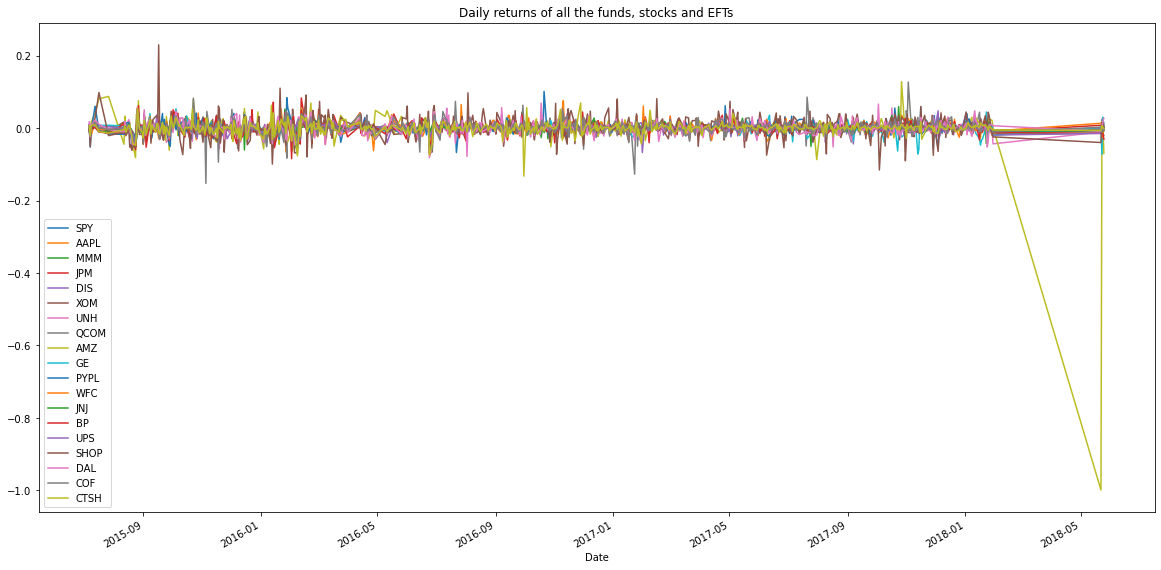

In [12]:
# Plot daily returns of all portfolios
all_stock_returns.plot(figsize=(20, 10))
plt.title("Daily returns of all the funds, stocks and EFTs")

In [13]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+all_stock_returns).cumprod() -1
cumulative_returns.head()

,SPY,AAPL,MMM,JPM,DIS,XOM,UNH,QCOM,AMZ,GE,PYPL,WFC,JNJ,BP,UPS,SHOP,DAL,COF,CTSH
Date,,,,,,,,,,,,,,,,,,,
2015-07-07,0.006289,-0.002460,0.002256,-0.007872,0.012100,0.004120,-0.011951,-0.004912,-0.012500,0.006081,-0.002452,-0.003366,0.007332,-0.005011,0.008690,0.007534,0.017292,0.001596,0.005670
2015-07-08,-0.010594,-0.027222,-0.015283,-0.028219,-0.004408,-0.006785,-0.027669,-0.019014,-0.017298,-0.015963,-0.054753,-0.021084,-0.004379,-0.019043,-0.012104,-0.043891,-0.007658,-0.017550,-0.015510
2015-07-09,-0.008804,-0.047064,-0.008577,-0.018120,-0.000864,-0.011269,-0.023085,-0.019807,-0.001010,-0.011022,-0.060202,-0.016655,0.002037,-0.019544,-0.009414,-0.048149,0.001729,-0.011624,-0.007838
2015-07-13,0.002136,-0.028666,0.001149,-0.002890,0.012951,-0.008863,-0.020685,-0.008869,0.040530,-0.003493,-0.003581,-0.005082,0.009487,-0.018070,-0.001242,-0.021781,0.023198,0.003709,0.000802
2015-07-17,0.002986,-0.020277,-0.001909,-0.007908,0.011164,-0.012450,-0.029152,-0.012093,0.124621,0.003878,-0.009771,-0.009016,-0.000796,-0.028500,-0.000012,0.074078,0.034012,0.004040,-0.008688


Text(0.5, 1.0, 'Daily returns of all the funds, stocks and EFTs')

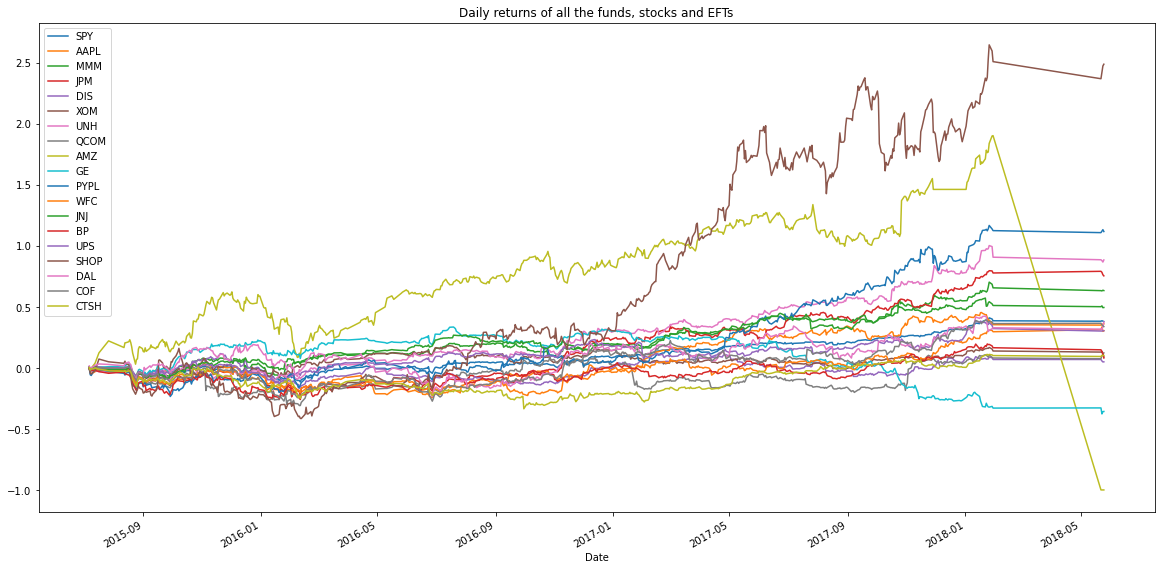

In [14]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))
plt.title("Daily returns of all the funds, stocks and EFTs")

Text(0.5, 1.0, 'cumulative returns in form of a box presentation of all the funds and SPY')

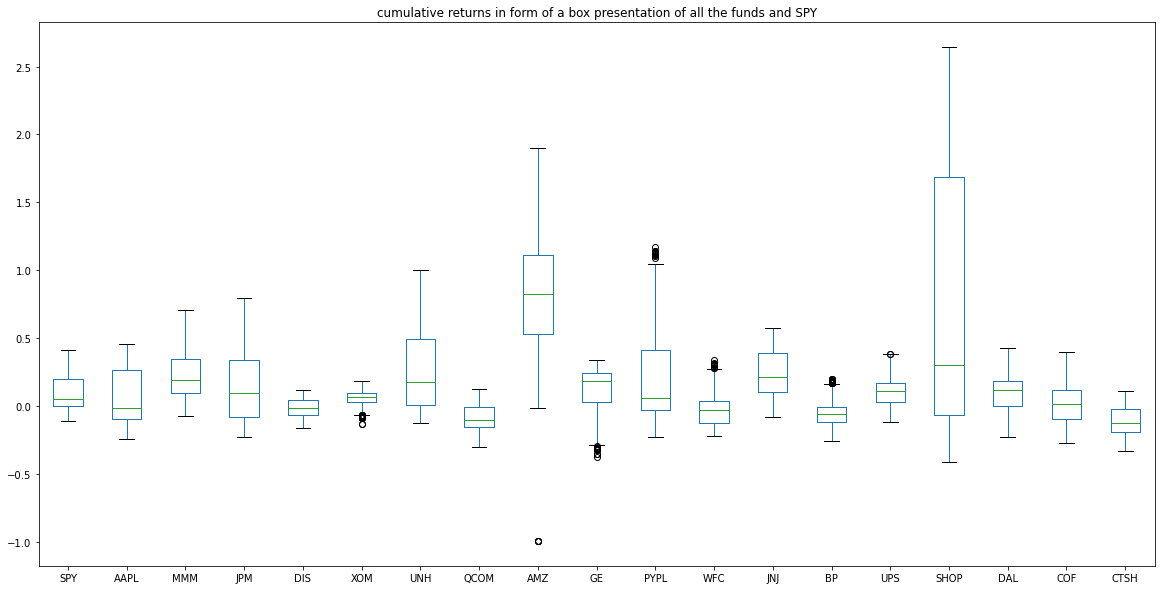

In [15]:
# Box plot to visually show risk
cumulative_returns.plot.box(figsize=(20,10))

plt.title("cumulative returns in form of a box presentation of all the funds and SPY")

In [16]:
cumulative_std = cumulative_returns.std()
print(cumulative_std)

SPY     0.123443
AAPL    0.201531
MMM     0.181216
JPM     0.270153
DIS     0.066817
XOM     0.059607
UNH     0.281153
QCOM    0.097767
AMZ     0.432946
GE      0.163927
PYPL    0.353487
WFC     0.114650
JNJ     0.167372
BP      0.094671
UPS     0.098379
SHOP    0.889650
DAL     0.133610
COF     0.146957
CTSH    0.102763
dtype: float64


In [17]:
# Determine which portfolios are riskier than the S&P 500
cumulative_risk = cumulative_std[cumulative_std > cumulative_std["SPY"]]
print(cumulative_risk)

AAPL    0.201531
MMM     0.181216
JPM     0.270153
UNH     0.281153
AMZ     0.432946
GE      0.163927
PYPL    0.353487
JNJ     0.167372
SHOP    0.889650
DAL     0.133610
COF     0.146957
dtype: float64


In [18]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = cumulative_std * np.sqrt(252)
annual_std


SPY      1.959594
AAPL     3.199205
MMM      2.876714
JPM      4.288543
DIS      1.060693
XOM      0.946234
UNH      4.463164
QCOM     1.552006
AMZ      6.872808
GE       2.602268
PYPL     5.611429
WFC      1.820010
JNJ      2.656943
BP       1.502854
UPS      1.561722
SHOP    14.122757
DAL      2.120989
COF      2.332870
CTSH     1.631316
dtype: float64

In [19]:
# Calculate  the daily standard deviation of SP500
print(cumulative_std["SPY"])
# Determine which portfolios are riskier than the S&P TSX 60
cumulative_risk = cumulative_std[cumulative_std > cumulative_std["SPY"]]
print(cumulative_risk)

0.12344282432271729
AAPL    0.201531
MMM     0.181216
JPM     0.270153
UNH     0.281153
AMZ     0.432946
GE      0.163927
PYPL    0.353487
JNJ     0.167372
SHOP    0.889650
DAL     0.133610
COF     0.146957
dtype: float64


In [20]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = cumulative_std * np.sqrt(252)
annual_std

SPY      1.959594
AAPL     3.199205
MMM      2.876714
JPM      4.288543
DIS      1.060693
XOM      0.946234
UNH      4.463164
QCOM     1.552006
AMZ      6.872808
GE       2.602268
PYPL     5.611429
WFC      1.820010
JNJ      2.656943
BP       1.502854
UPS      1.561722
SHOP    14.122757
DAL      2.120989
COF      2.332870
CTSH     1.631316
dtype: float64

Text(0.5, 1.0, 'Heat map of correlation for all the funds and SPY')

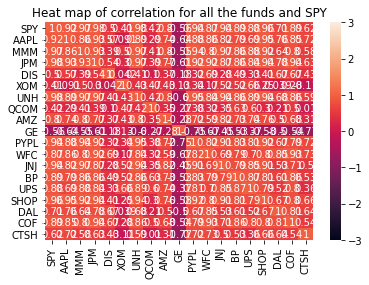

In [22]:
# Calculate the correlation
import seaborn as sns

correlation = cumulative_returns.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-3, vmax=3, annot=True)
correlation
plt.title("Heat map of correlation for all the funds and SPY")

0.022957378887980134
0.015238130876769245
1.50657


Text(0.5, 1.0, 'Beta Trend based on corelation of cumulative return')

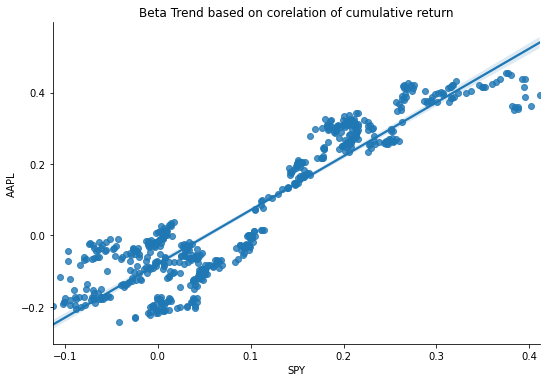

In [24]:
# Calculate covariance of a single portfolio
covariance = cumulative_returns["AAPL"].cov(cumulative_returns["SPY"])
print(covariance)
# Calculate variance of S&P TSX
variance = cumulative_returns["SPY"].var()
print(variance)

# Computing beta
aapl_beta = (covariance/variance).round(5)
print(aapl_beta)
# Plot beta trend
import seaborn as sns
sns.lmplot(x='SPY', y='AAPL', data=cumulative_returns, aspect=1.5, fit_reg=True)
plt.title("Beta Trend based on corelation of cumulative return")

In [25]:
sharpe_ratios = (cumulative_returns.mean() * 252) / (cumulative_returns.std() * np.sqrt(252))
sharpe_ratios.sort_values()


CTSH   -16.696846
QCOM   -14.009506
BP      -9.676350
WFC     -4.287022
DIS     -4.173422
COF      2.046076
AAPL     5.142391
JPM      9.068909
PYPL     9.417190
DAL     11.597693
GE      11.824072
SPY     12.365114
SHOP    12.474937
UNH     15.016066
XOM     15.466038
UPS     16.911329
MMM     19.567231
JNJ     21.870696
AMZ     29.699321
dtype: float64

Text(0.5, 1.0, 'Sharpe ratios of all the funds and SPY')

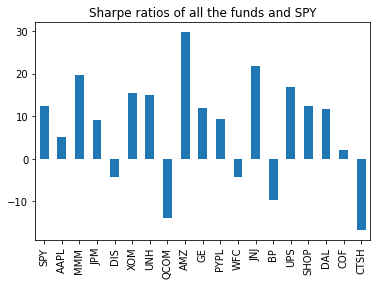

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()
plt.title("Sharpe ratios of all the funds and SPY")